# Scraping Twitter Data Using the Tweepy Module

### Instructions

1. Download the tweepy module
2. Download the nltk and json modules
3. Register a Developer account with Twitter
4. Run this notebook

#### 1. Download the tweepy module

tweepy is one of the Python modules to utilize Twitter's developer API. This module makes it very easy to scrape tweets.

The download for this should be straightforward. If you downloaded Python correctly, it should have come with a package manager called 'pip'. Pip lets you download various packages that don't come with Anaconda. 

In the Command Prompt (or Terminal for Macs), enter 'pip install tweepy' to download the module onto your computer. This will save the package onto your machine. Then, all you need to do is import tweepy into your environment (shown below).

#### 2. Download the nltk and json modules

The nltk (Natural Language Toolkit) module is Python's module for natural language processing. We will use it to analyze the words of specific tweets.

The json (Javascript Object Notation) module is using for parsing JSON data (the form that Twitter data comes in).

Download these two packages the same way you installed tweepy. Enter 'pip install nltk' and 'pip install json' into your Command Prompt or Terminal.

#### 3. Register a Developer Account with Twitter

Go to https://dev.twitter.com/ and click "Join" to make an account. After registering, you will need to Create an App. You will need to create a name for your app and give it a URL for your app. Try to just make up a dummy URL for your app unless you have a legitimate site you want to use. This part isn't such a big deal.

Once you make an account and register your app, you will need to find 4 codes they give you:

1. Consumer Key
2. Consumer Secret
3. Access Token
4. Access Secret.

Make sure you keep track of these somewhere because you will need to use them in your Python code.

#### 4. Try out some code!

This is some basic code you can try to get the feel for pulling tweets into Python. This is very simple code and much more advanced analysis can be done.

In [1]:
# Import modules
import tweepy
import pandas as pd
import nltk.corpus as nl
import matplotlib.pyplot as plt
import json
from collections import Counter

In [2]:
# Enter your codes here
consumer_key = "edd2UXhicdden5CmazSi812K2"
consumer_secret = "Nhu2NS0N1UuALibayS1JAK5AITaZhJj6L7WN9Tgx57UMRTvsnc"
access_token = "377695843-eco3jczvXVf7viyySd8UU0tedf8sgHLKWiRaGG1h"
access_secret = "T8oc0z1z2Rs4yVrOmO62TGYY3LROWMTfovhHfR0XxX9Qp"

# Set up connection to Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [3]:
# Read the top 10 tweets from your own timeline

for status in tweepy.Cursor(api.home_timeline).items(10):
    # Process a single status
    print(status.text) 

How Uber Depends on Data Analytics to Deliver Extreme Customer Service : Face To Face With Uber's Chief Data Archit… https://t.co/WAyGJYHw4V
RT @thebiasbitch: White people have the luxury to not care about politics because they don’t HAVE to.  It’s more than a disagreement when t…
My Mom had me when she was 41. My Father was 60 (!) when I was born. I thought with age came a ton of wisdom. I thi… https://t.co/sANmtmJREq
President Trump made at least 26 false claims in his 87-minute rally speech in Dallas on Thursday, including an ina… https://t.co/4ieL1wCQKu
Can Boris Johnson ‘get Brexit done’? https://t.co/yKTf7cRv3U
Donald Trump’s presidency continues its bizarre degeneration https://t.co/CWGtB09Mgm
Trader Rokos restructures firm in bid to improve performance https://t.co/ibQfLmLANG
A new exhibition at London's Design Museum features over 200 objects and full-size Mars habitat modules that explor… https://t.co/HhYfjB6wTk
Holiday season warning cools retail stocks https://t.co/LIta8xbY

#### Take a loop at the president's tweets

In [4]:
# Get his most recent 200 tweets
new_tweets = api.user_timeline(screen_name = "realDonaldTrump",count=200)

After a little bit of formatting, you'll see that Tweets come in the form of dictionaries! (See, they are useful!)

In [5]:
# Use the JSON module to put the tweet in the format we want
tweet_dict = json.loads(json.dumps(new_tweets[0]._json).encode('UTF-8')) # Just look at the most recent tweet

Let's take a look at the keys and values from a tweet dictionary data type.

In [6]:
for key in tweet_dict:
    print ("%s: %s" % (key, tweet_dict[key]))

created_at: Fri Oct 18 15:51:42 +0000 2019
id: 1185221926991609862
id_str: 1185221926991609862
text: Can you believe I am doing this important work for our Country, and have to deal with Corrupt Adam Schiff and the D… https://t.co/a9HvmsXW6O
truncated: True
entities: {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/a9HvmsXW6O', 'expanded_url': 'https://twitter.com/i/web/status/1185221926991609862', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}
source: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
in_reply_to_status_id: None
in_reply_to_status_id_str: None
in_reply_to_user_id: None
in_reply_to_user_id_str: None
in_reply_to_screen_name: None
user: {'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/OMxB0x7xC5', 'entities': {'url'

## Now, we can start to do some analysis...

First, let's get the data in the right form.

In [7]:
# Get the elements of the tweet that we want
outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in new_tweets]

# Put tweets in a pandas dataframe
df = pd.DataFrame(outtweets)
df.columns = ["ID", "Date", "Tweet"]
df = df.set_index(keys= "Date", drop= True)
df.head()

,ID,Tweet
Date,,
2019-10-18 15:51:42,1185221926991609862,b'Can you believe I am doing this important wo...
2019-10-18 15:46:14,1185220552254017537,b'DEFEAT TERRORISM! https://t.co/8WbnLPgWIK'
2019-10-18 15:42:37,1185219643432230913,b'....I have just been notified that some Euro...
2019-10-18 15:42:37,1185219642668867585,"b'.....this thinking years ago. Instead, it wa..."
2019-10-18 15:42:37,1185219641972539392,b'Just spoke to President @RTErdogan of Turkey...


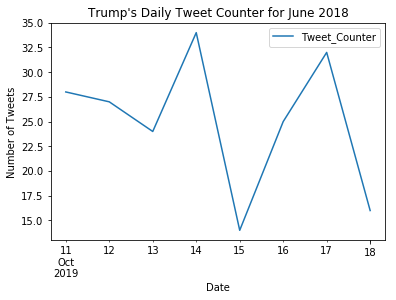

In [8]:
# Add a field to count his tweets
df["Tweet_Counter"] = 1
df_daily = df.resample("D").sum()
df_daily.plot()
plt.title("Trump's Daily Tweet Counter for June 2018")
plt.ylabel("Number of Tweets")
plt.show()

## Now, let's look at the word choice...

First, let's do some data cleaning so we can actually count the words.

In [9]:
result = Counter(" ".join(str(txt) for txt in df['Tweet'].values.tolist()).split(" ")).items()
word_counts = pd.DataFrame(list(result))
word_counts.columns = ["Word", "Count"]
word_counts = word_counts.sort_values(by="Count", ascending = False)

In [10]:
word_counts.head()

,Word,Count
20,the,124
14,to,73
66,of,60
79,b'RT,58
12,and,52


In [11]:
# Set all words to lower case
word_counts["Word"] = word_counts["Word"].str.lower()

# Remove punctuation
word_counts['Word'] = word_counts['Word'].str.replace('[^\w\s]','')

# Remove stopwords
s_words = nl.stopwords.words("English")
s_words.append("")
s_words.append("amp")
s_words.append("b'")
s_words.append("brt")
s_words.append("bthe")
word_counts = word_counts[~word_counts["Word"].isin(s_words)]

In [12]:
word_counts.head()

,Word,Count
293,realdonaldtrump,13
64,president,11
399,new,11
19,schiff,10
259,democrats,9


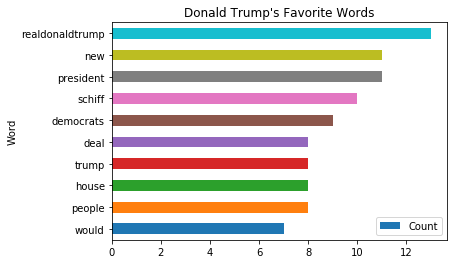

In [13]:
# Plot the top n words and their word counts
n = 10
plt.figure()
word_counts.iloc[0:n].sort_values(by = "Count", ascending = True).plot(kind = 'barh', x = 'Word', y = 'Count')
plt.title("Donald Trump's Favorite Words")

plt.show()

In [14]:
new_tweets[0].text.encode('UTF-8')

b'Can you believe I am doing this important work for our Country, and have to deal with Corrupt Adam Schiff and the D\xe2\x80\xa6 https://t.co/a9HvmsXW6O'